In [2]:
import pandas as pd
import os

In [3]:
PATH = "data"

#### data_2d.csv

In [4]:
df = pd.read_csv(os.path.join(PATH, 'data_2d.csv'), header=None)
df

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [5]:
# Select the features for clustering (X)
X = df[[1,2]]
X

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218
...,...,...
195,0.629144,4.378584
196,-0.723824,5.361801
197,1.346107,2.333476
198,3.608219,3.411546


In [6]:
# Standardize the features (optional but recommended for k-means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Try different values of k (e.g., from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

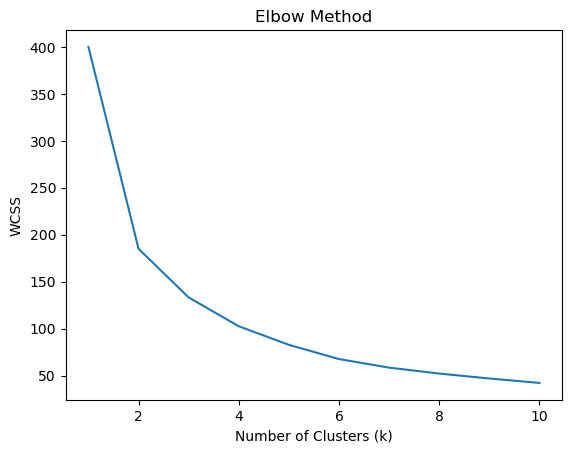

In [8]:
from matplotlib import pyplot as plt

# Plot the elbow curve 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [9]:
from kneed import KneeLocator

# Determine the optimal k using the KneeLocator
knee_locator = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
optimal_k

3

In [10]:
from sklearn.cluster import KMeans

optimal_k =  3
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init='auto', random_state=0)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)
cluster_labels

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2], dtype=int32)

In [11]:
kmeans_optimal.cluster_centers_

array([[-0.02541038,  0.3787169 ],
       [-0.80837593, -1.05907021],
       [ 1.27122632,  0.98736437]])

In [12]:
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

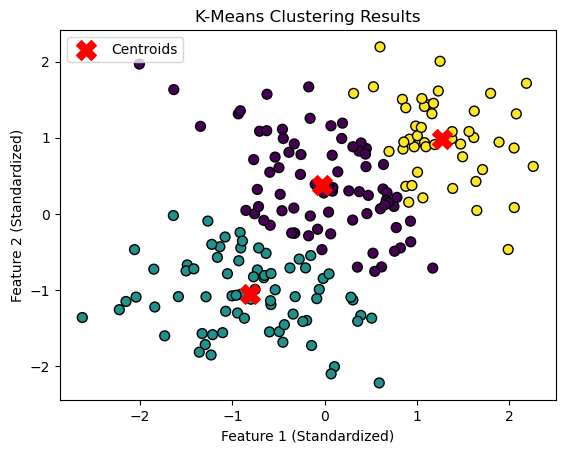

In [13]:
# Scatter plot the data points with different colors for each cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

#### mnist.csv

In [14]:
from sklearn.decomposition import PCA

df_mnist = pd.read_csv(os.path.join(PATH, 'mnist.csv'), header=None)
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_mnist)
scaled_data

array([[ 0.91324432,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.82825896,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.17655962,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13165765,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52486028,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56494367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
# Apply PCA to reduce dimensionality to 2D
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)
pca_result

array([[-4.52844768e+00,  4.19696565e+00],
       [ 5.02576553e+00, -1.24652259e+01],
       [-6.90743825e+00, -5.89052630e+00],
       [ 8.58418727e+00, -3.37688358e-01],
       [ 1.10589379e+00,  6.57719267e+00],
       [-7.56333641e+00, -5.60807218e+00],
       [-1.28199292e+00,  4.34595573e+00],
       [-3.56504868e+00,  5.07718965e+00],
       [ 3.74364189e+00,  8.15915883e-01],
       [-4.58925995e-01,  4.40542459e+00],
       [ 1.39235177e+01, -4.86840957e+00],
       [ 7.48376256e+00, -2.23203658e+00],
       [-4.69924998e+00,  6.85839045e+00],
       [ 9.11096697e+00,  1.90329084e+00],
       [-8.13251725e+00, -6.98225965e+00],
       [ 4.87242480e+00, -4.44898511e+00],
       [-8.15892948e-01,  9.12679551e+00],
       [-2.14235778e+00,  6.34618267e+00],
       [ 8.88203911e+00, -1.69203665e-01],
       [-3.39911173e+00,  5.31659914e+00],
       [-4.87602393e+00,  1.55858102e+00],
       [ 3.68403196e-01, -1.19994840e+00],
       [ 1.60981432e+00,  9.69739585e-01],
       [-2.

In [17]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pc_df

,PC1,PC2
0,-4.528448,4.196966
1,5.025766,-12.465226
2,-6.907438,-5.890526
3,8.584187,-0.337688
4,1.105894,6.577193
...,...,...
495,8.575663,-1.872988
496,-3.367099,7.348805
497,-6.207991,0.235455
498,0.380127,-0.372657


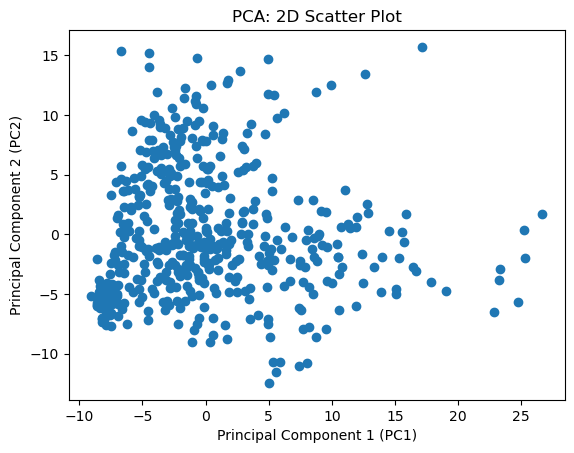

In [18]:
# Scatter plot of the first two principal components
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.title('PCA: 2D Scatter Plot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

In [19]:
# Elbow Method to find optimal number of clusters (k) for K-Means
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=0)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

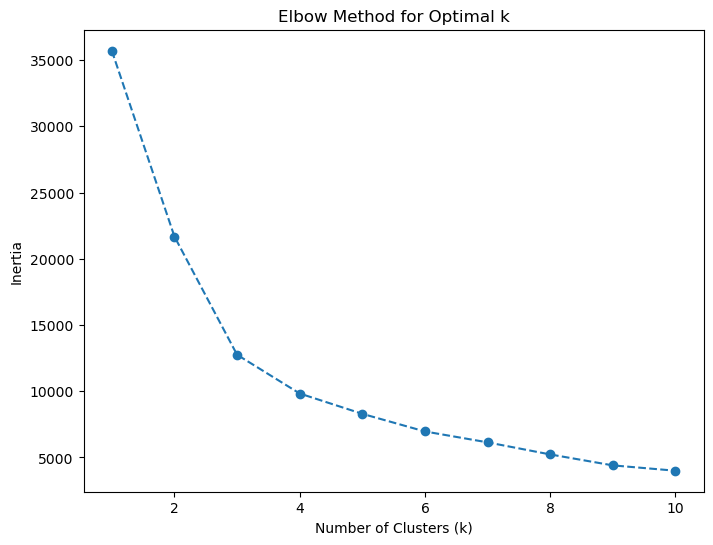

In [20]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
from kneed import KneeLocator

# Determine the optimal k using the KneeLocator
knee_locator = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
optimal_k

3

In [22]:
# Apply K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init='auto', random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result)

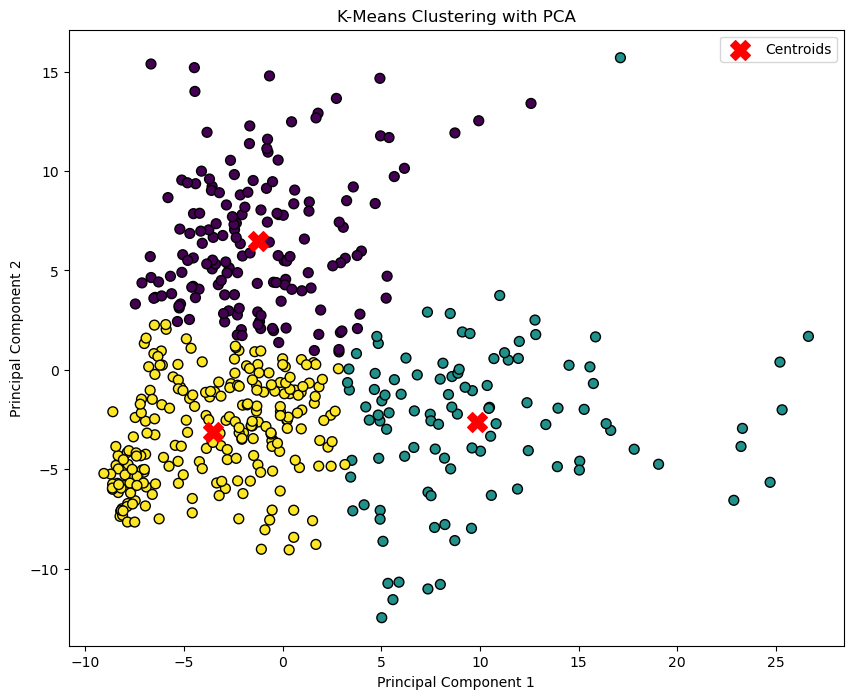

In [23]:
# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()